# Loan Data (from Prosper) Exploration

<a id='intro'></a>
## What is/are the main feature(s) of interest in your dataset?

I don't know now but I expect to find out what features can explain loans interest.

What factors affect a loan’s outcome status?


What affects the borrower’s APR or interest rate?


Are there differences between loans depending on how large the original loan amount was?

<a id="wrangling"></a>
## Preliminary Wrangling

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

* This [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1664203594297786&usg=AOvVaw1M4pBR3jcCIzQ0W1t2kisP) explains the variables in the data set.
* You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[unicodedecodeerror-utf-8-codec-while-reading-a-csv-file](https://stackoverflow.com/questions/33819557/unicodedecodeerror-utf-8-codec-while-reading-a-csv-file)

In [2]:
prosperLoanData = pd.read_csv('prosperLoanData.csv', encoding='utf-8', engine='python')

<a id="uni_eda_question03"></a>
### The most contracted loan `Term`

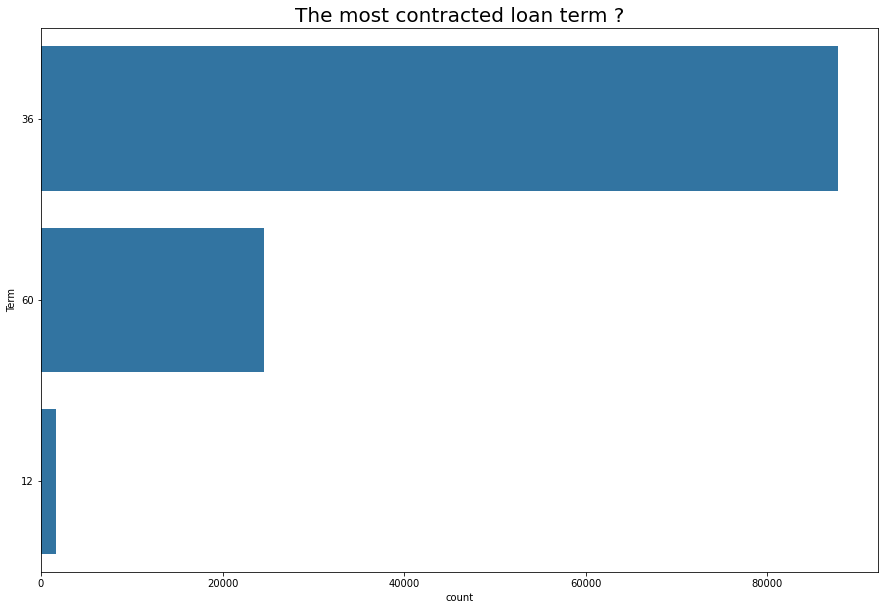

In [9]:
special_barplot(data=prosperLoanData, colname='Term');
plt.title('The most contracted loan term ?', fontdict={'fontsize': 20});

The most contracted loan term is the length of `36 months` with more than 80000 contracts.

<a id="uni_eda_question04"></a>
### `BorrowerAPR` distribution

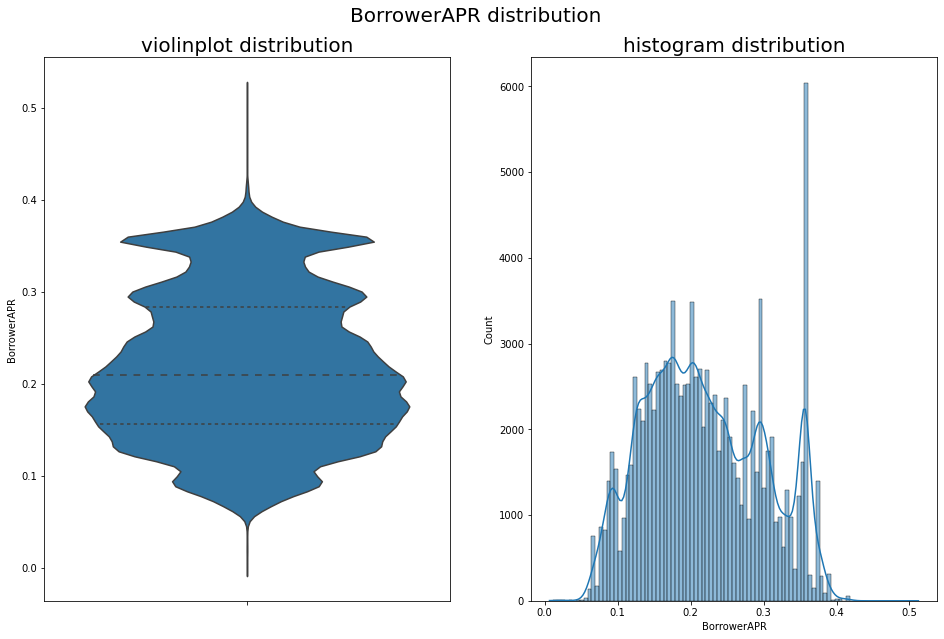

In [11]:
plt.figure(figsize = (16, 10));
plt.suptitle('BorrowerAPR distribution', x=0.5, y=0.95, fontproperties={'size': 20});
plt.subplot(1, 2, 1)
sns.violinplot(data=prosperLoanData, y='BorrowerAPR', inner='quartile');
plt.title('violinplot distribution', fontdict={'fontsize': 20});
plt.subplot(1, 2, 2)
sns.histplot(data=prosperLoanData, x='BorrowerAPR', kde=True);
plt.title('histogram distribution', fontdict={'fontsize': 20});

- The distribution is slightly normal

- With a standard deviation of `0.080364` the median value of the BorrowerAPR is `0.209760` and it is closest to the mean `0.218828`. It means that the BorrowerAPR is really good for loans.

<a id="uni_eda_question05"></a>
### `ProsperRating` distribution

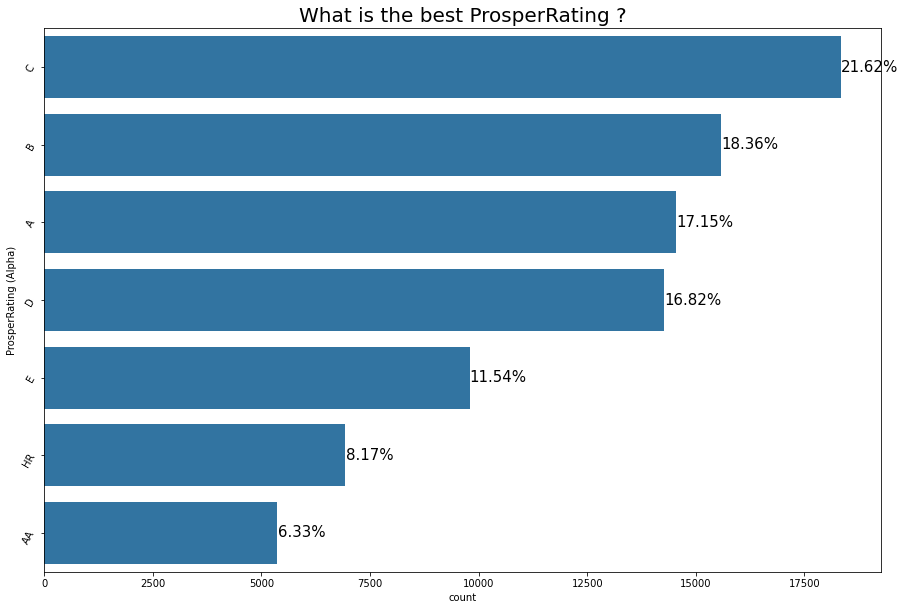

In [12]:
special_barplot(data=prosperLoanData, colname='ProsperRating (Alpha)');
plt.title('What is the best ProsperRating ?', fontdict={'fontsize': 20});

The best ProsperRating is 
* The grade `C` is the most represented with `21.62%` and followed by
* The grade `B` is the second most represented with `18.36%` and followed by
* The grade `A` is the third most represented with `17.15%`

<a id="uni_eda_question07"></a>
### `ListingCategory` distribution

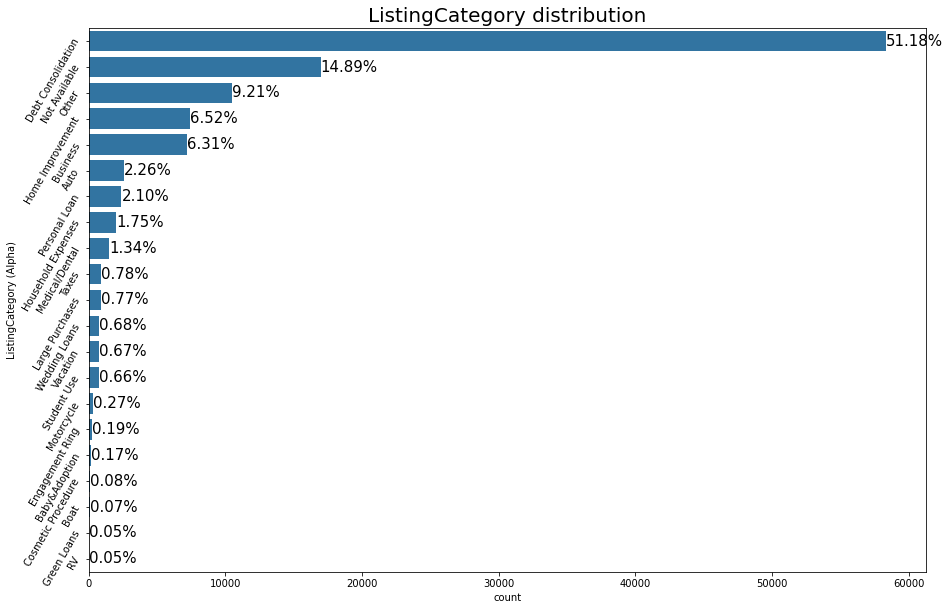

In [17]:
#plt.figure(figsize = (8, 10));
# Creating a variable for coresponding listing category numbers to their meaning.
prosperLoanData['ListingCategory (Alpha)'] = prosperLoanData['ListingCategory (numeric)'].apply(lambda val: ListingCategoryDict[val]);
special_barplot(data=prosperLoanData, colname='ListingCategory (Alpha)');
plt.title('ListingCategory distribution', fontdict={'fontsize': 20});

Most of the loans are for `Debt Consolidation`. Really inspiring.

<a id="uni_eda_question08"></a>
### `Investors` distribution

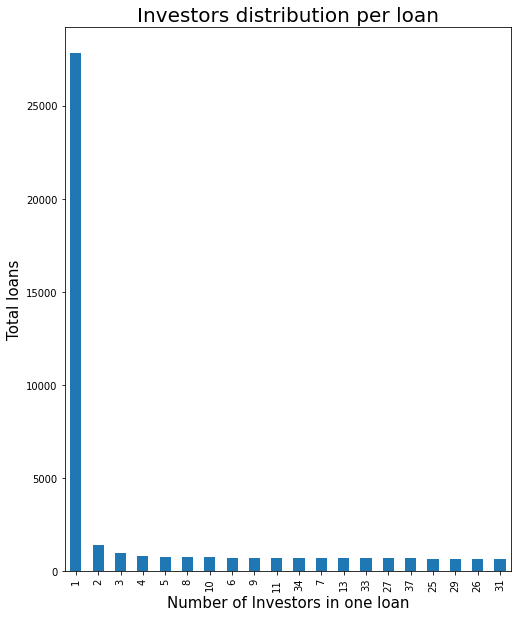

In [19]:
plt.figure(figsize = (8, 10));
prosperLoanData['Investors'].value_counts().nlargest(20).plot(kind='bar');
plt.title('Investors distribution per loan', fontdict={'fontsize': 20});
plt.xlabel(xlabel='Number of Investors in one loan', fontdict={'fontsize': 15});
plt.ylabel(ylabel='Total loans', fontdict={'fontsize': 15});

Almost all loans are funded by one investor. (More than 25000 loans.)

<a id="uni_eda_question09"></a>
### `EmploymentStatus`, `Occupation`, `EmploymentStatusDuration` and `IsBorrowerHomeowner` distribution

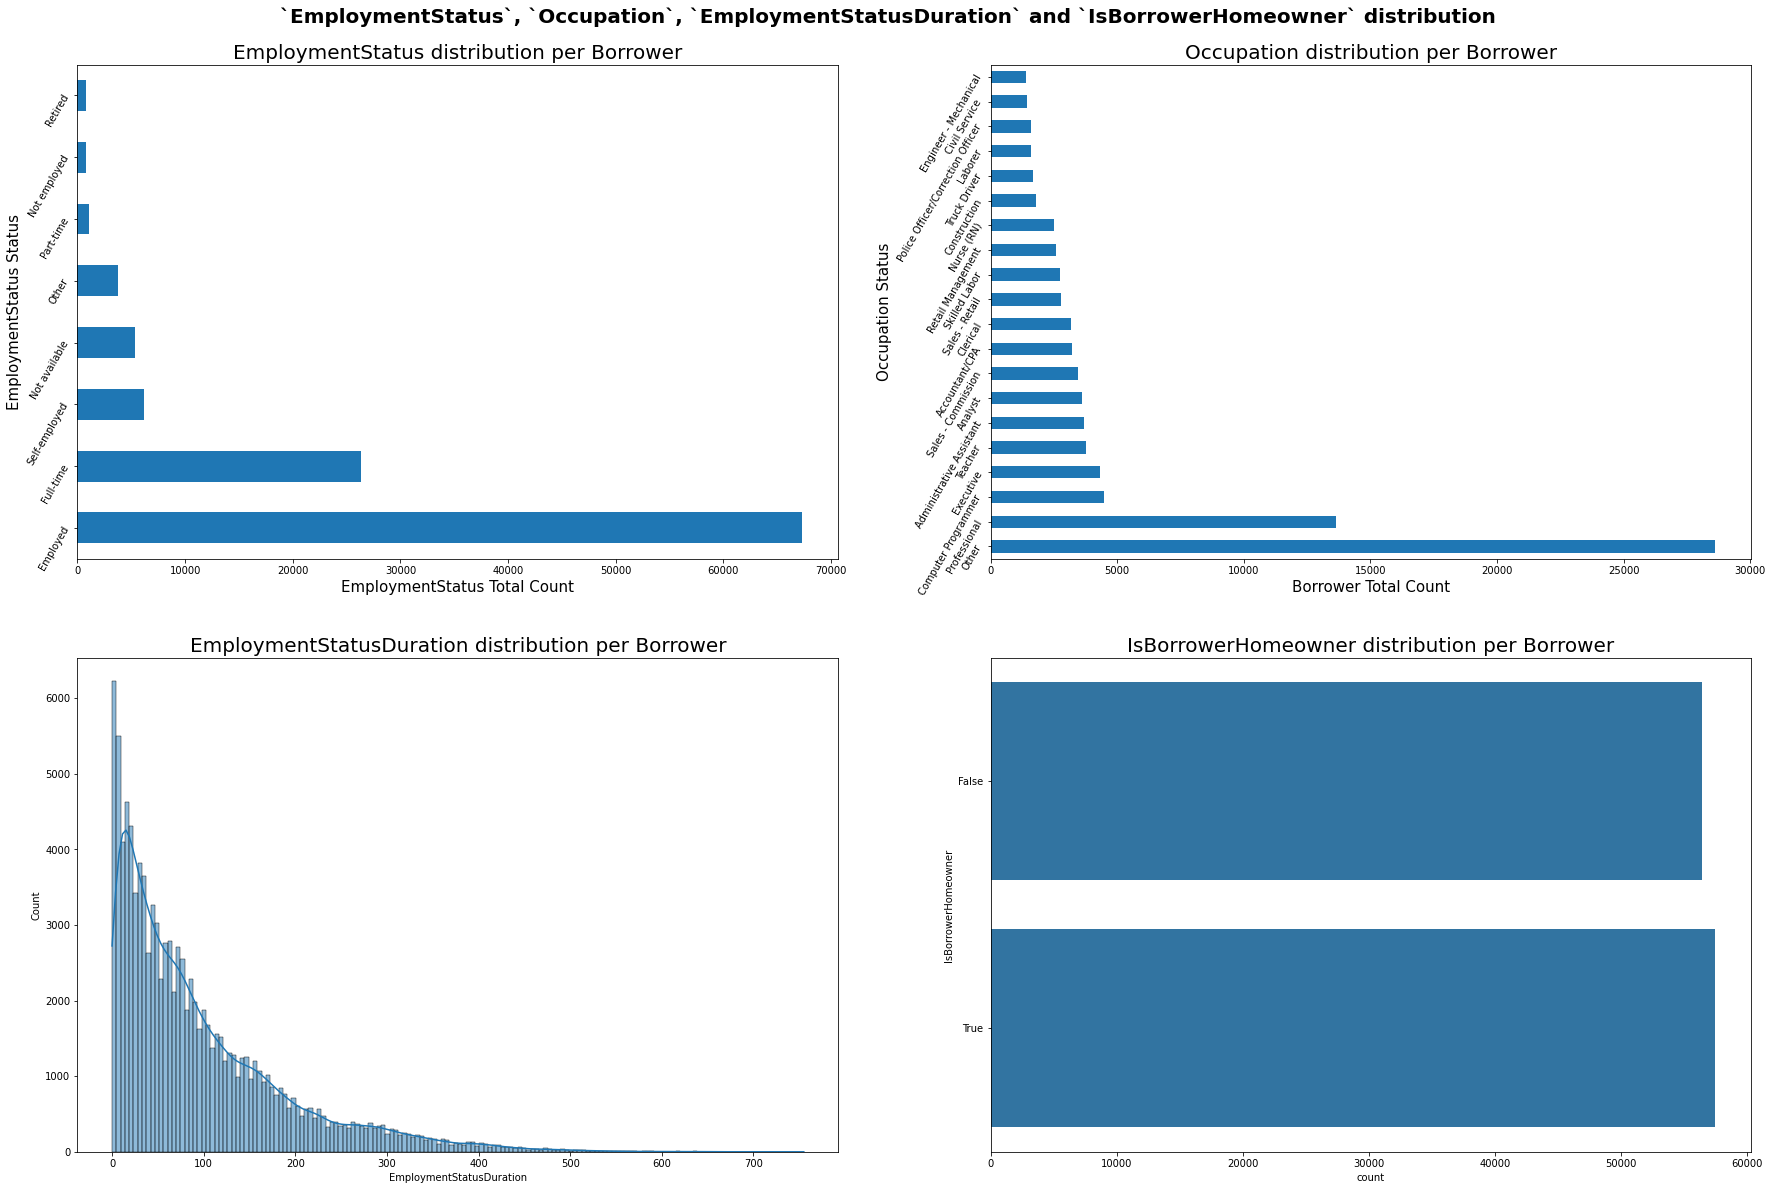

In [20]:
plt.figure(figsize = (30, 20));
plt.suptitle('`EmploymentStatus`, `Occupation`, `EmploymentStatusDuration` and `IsBorrowerHomeowner` distribution', fontsize=20, fontweight='bold', x=0.5, y=0.92)

plt.subplot(2, 2, 1)
prosperLoanData['EmploymentStatus'].value_counts().nlargest(20).plot(kind='barh');
plt.title('EmploymentStatus distribution per Borrower', fontdict={'fontsize': 20});
plt.xlabel(xlabel='EmploymentStatus Total Count', fontdict={'fontsize': 15});
plt.ylabel(ylabel='EmploymentStatus Status', fontdict={'fontsize': 15});
plt.yticks(rotation=60);

plt.subplot(2, 2, 2)
prosperLoanData['Occupation'].value_counts().nlargest(20).plot(kind='barh');
plt.title('Occupation distribution per Borrower', fontdict={'fontsize': 20});
plt.xlabel(xlabel='Borrower Total Count', fontdict={'fontsize': 15});
plt.ylabel(ylabel='Occupation Status', fontdict={'fontsize': 15});
plt.yticks(rotation=60);

plt.subplot(2, 2, 3)
sns.histplot(data=prosperLoanData, x='EmploymentStatusDuration', kde=True);
plt.title('EmploymentStatusDuration distribution per Borrower', fontdict={'fontsize': 20});

plt.subplot(2, 2, 4);
sns.countplot(data=prosperLoanData, y='IsBorrowerHomeowner', color=sns.color_palette()[0]);
plt.title('IsBorrowerHomeowner distribution per Borrower', fontdict={'fontsize': 20});

- Most of the Borrowers are employed(Employed, Full-time or Self-employed)

- Most of the Borrowers don't specify their Occupations.

    * More than `10000` Borrowers are `Professionals`

    * Around `5000` Borrowers are `Computer Programmer` and `Executive`

    * Around `4000` Borrowers are `Teacher`,  `Administrative Assistant` and `Analyst`

- Around `50%` of Borrowers are either Homeowners or not Homeowners.

- Looks like there needs to be an employee for some time (about 100 months) in order to the a borrower, assuming your employement come with high revenues. (to be able to be Homeowner.)

<a id="multi_eda_question03"></a>
### Relationship between `LoanOriginalAmount` and `BorrowerAPR` per `ProsperRating (Alpha)` per `IncomeRange`

<Figure size 1440x720 with 0 Axes>

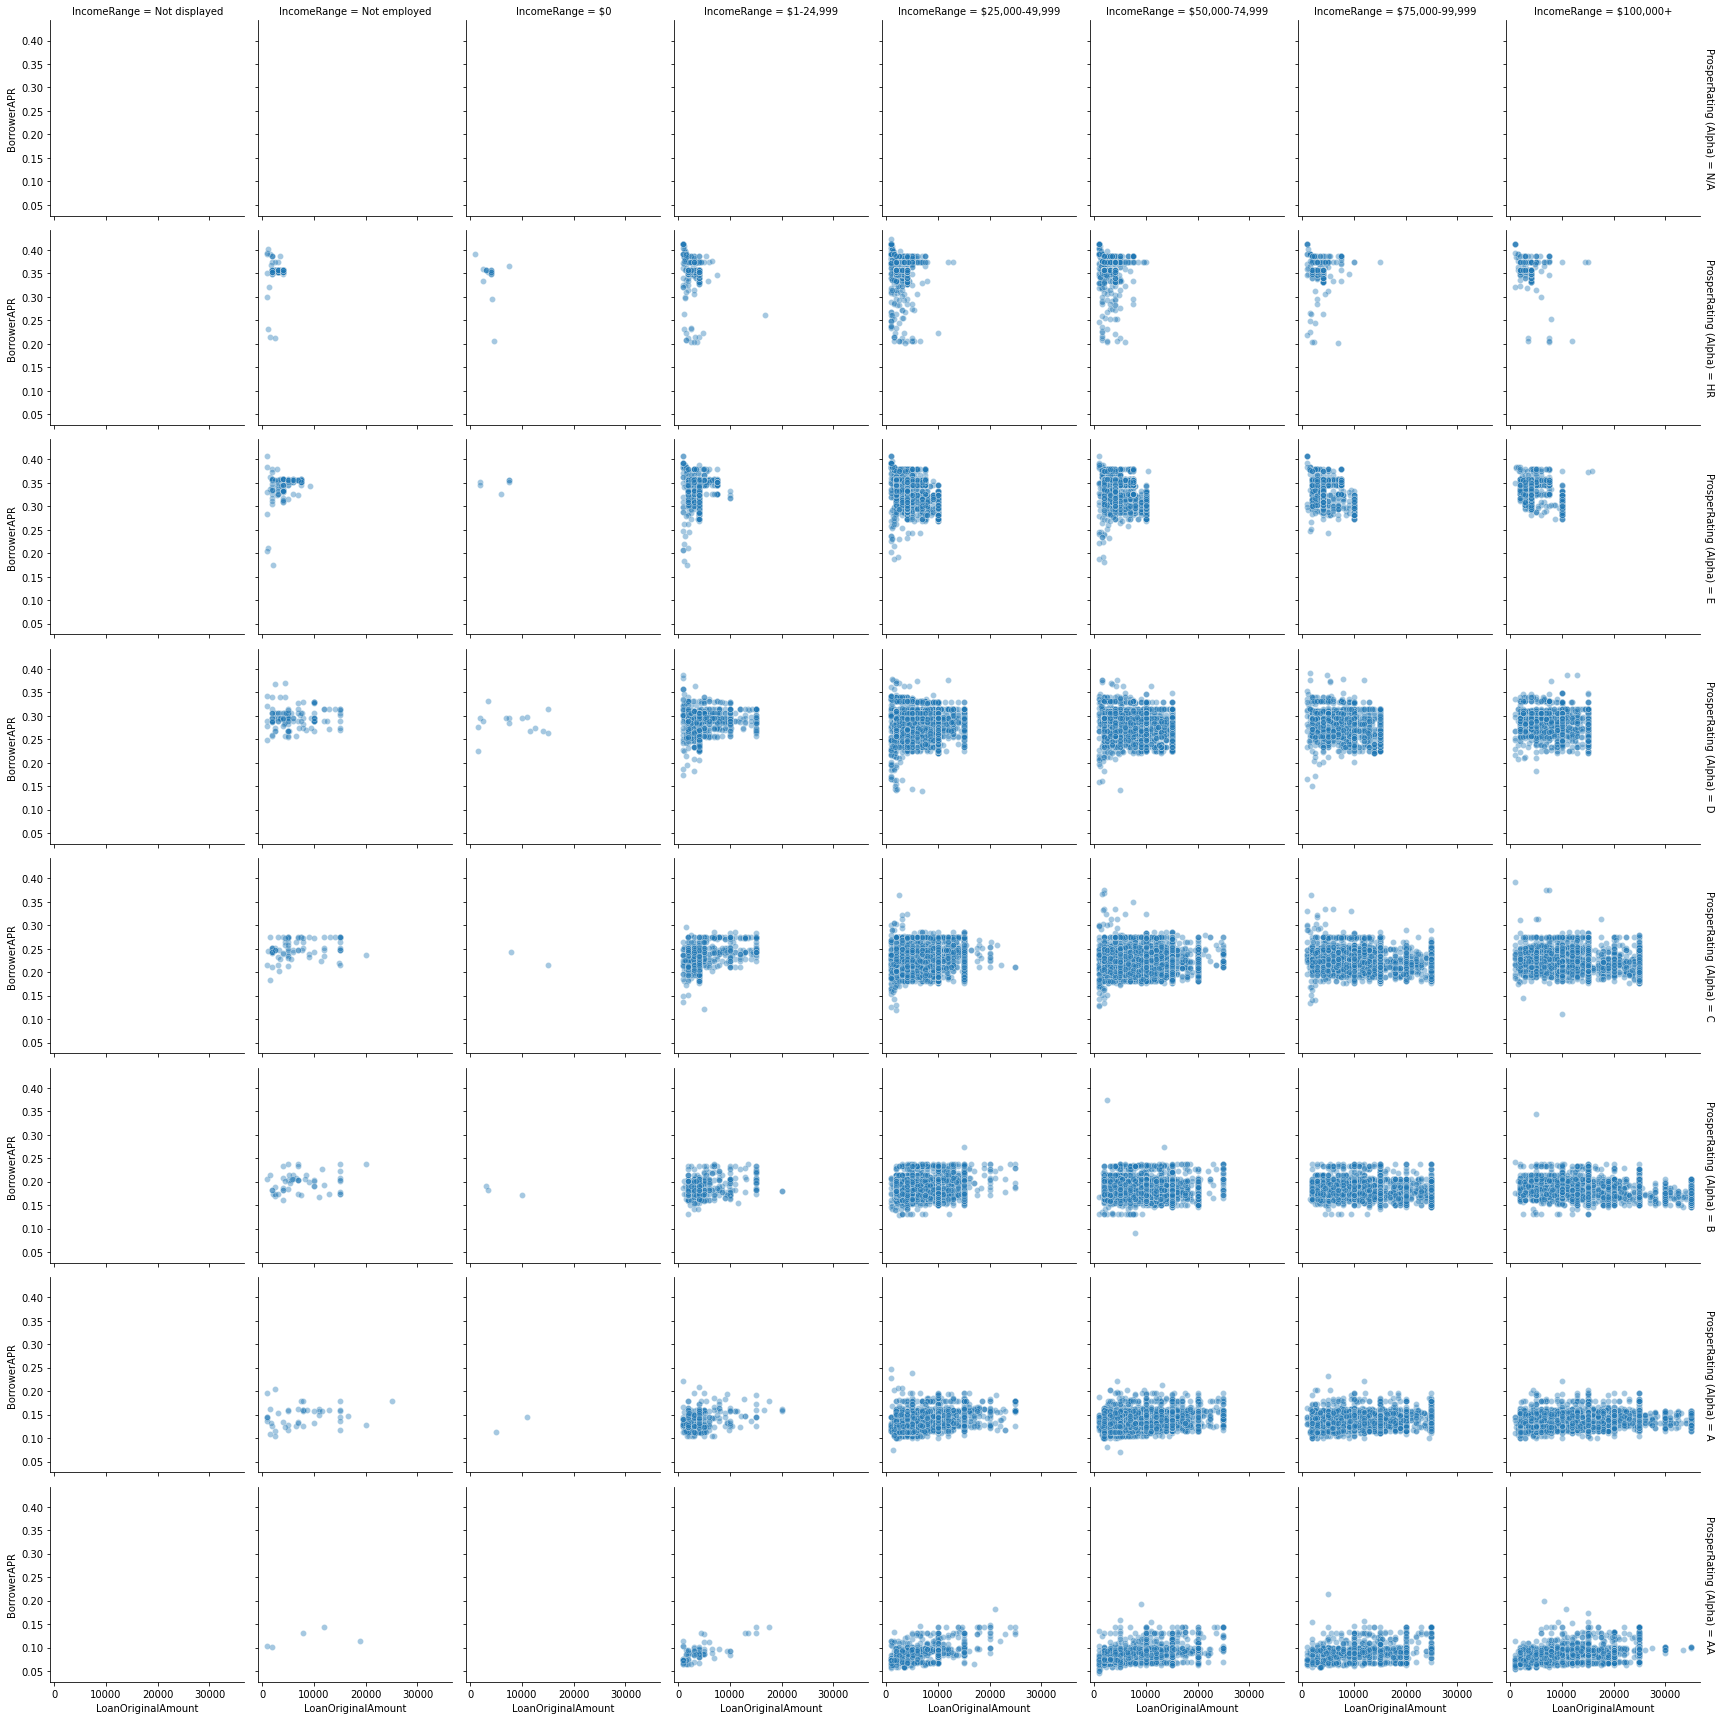

In [32]:
plt.figure(figsize = (20, 10));
g = sns.FacetGrid(data=prosperLoanData, col='IncomeRange', row='ProsperRating (Alpha)', margin_titles=True);
g.map_dataframe(sns.scatterplot, x='LoanOriginalAmount', y='BorrowerAPR', alpha=0.4);

- For `IncomeRange ='Not employed'` it is really difficult to have loan with even a little amount`LoanOriginalAmount` , with even a lower `ProsperRating (Alpha)` score
- For `'IncomeRange =$0'` it is merely impossible to have a loan no matter the `ProsperRating (Alpha)` score
- The `BorrowerAPR` range tend to be lower when the `IncomeRange` tend to be higher and the `ProsperRating (Alpha)` score higher
- The `LoanOriginalAmount` range tend to be higher when the `IncomeRange` tend to be higher and  the `ProsperRating (Alpha)` score higher

<a id="feedback"></a>
## Feedback

Thank you for paying attention to my work. Please I need your review to improve myself.

- What do you notice about each visualization?
- What questions do you have about the data?
- What relationships do you notice?
- What do you think is the main takeaway from the report / presentation?
- Is there anything that you don’t understand from the plots?

Kindly reach me: 

- LinkedIn :  [jozias-tema](https://www.linkedin.com/in/jozias-tema-496a1523a/)
- GitHub :  [jozias-tema](https://github.com/temajozias/)
- Gmail :  [jozias-tema](mailto:temajozias@gmail.com) 
temajozias@gmail.com
